# <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> MOBILE PRICE CLASSIFIER

As the sole contributor, I developed a predictive model for classifying mobile phones into price ranges during my tenure as a Machine Learning Engineer at Mentorness, now available on my Github: [Joy Ogutu](https://github.com/Ogutu01)

***

### __Table of contents__

- [Business Understanding](#PROJECT-OVERVIEW)
- [Data Understanding](#DATA-UNDERSTANDING)
- [Data Preprocessing](#DATA-LOADING-AND-PREPROCESSING)
- [Exploratory Data Analysis](#EXPLORATORY-DATA-ANALYSIS)
- [Modelling](#MODELLING)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)

### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> PROJECT OVERVIEW



### **Introduction**
In a world where technology constantly evolves, choosing the right mobile phone that meets both your needs and budget can be a daunting task. With countless options available, each boasting a myriad of features and price points, consumers often find themselves overwhelmed and uncertain about which device to invest in.

This project aims to alleviate this dilemma by harnessing the power of machine learning to develop a predictive model capable of classifying mobile phones into different price ranges based on their unique attributes. By doing so, we strive to provide consumers with a valuable tool that empowers them to make informed purchasing decisions.

### **Business Understanding**
The rapid evolution of technology has led to an explosion of mobile phone models with varying specifications and price points flooding the market. With such a wide array of choices, consumers often find themselves grappling with the dilemma of selecting a device that not only meets their requirements but also fits within their budget. This challenge is exacerbated by the lack of clear guidance and information, leaving consumers vulnerable to making uninformed decisions or being swayed by marketing tactics.

### **Problem Statement**
To build a predictive model that can accurately classify mobile phones into predefined price
ranges based on various attributes such as battery power, camera features, memory, connectivity options and more.

### **Objectives**
1. To explore and preprocess the dataset to handle missing values, outliers, and any other data
inconsistencies.
2. To perform exploratory data analysis (EDA) to gain insights into the relationships between different features and the target variable (`price_range`).
3. To select appropriate machine learning algorithms for classification and evaluate their performance
using suitable metrics.
4. To fine-tune the chosen model to improve its predictive accuracy.
5. To validate the final model using cross-validation techniques to ensure its robustness.
6. To deploy the model for real-time predictions if applicable.

### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> DATA UNDERSTANDING

The dataset provided contains a comprehensive set of features describing various aspects of mobile phones, including battery power, camera specifications, memory capacity, connectivity options, and more. Each mobile phone entry is labelled with its corresponding price range, ranging from low to very high cost. This rich dataset serves as the foundation for our machine learning model, enabling us to explore the relationships between different features and price range.

The dataset comprises the following columns:
- `battery_power`: Total energy a battery can store in mAh.
- `blue`: Bluetooth enabled (1 if yes, 0 if no).
- `clock_speed`: Speed at which microprocessor executes instructions.
- `dual_sim`: Dual SIM support (1 if yes, 0 if no).
- `fc`: Front Camera mega pixels.
- `four_g`: 4G network support (1 if yes, 0 if no).
- `int_memory`: Internal Memory (in gigabytes).
- `m_dep`: Mobile Depth in cm.
- `mobile_wt`: Weight of mobile phone.
- `n_cores`: Number of cores of the processor.
- `pc`: Primary Camera mega pixels.
- `px_height`: Pixel Resolution Height.
- `px_width`: Pixel Resolution Width.
- `ram`: Random Access Memory in megabytes.
- `sc_h`: Screen Height of mobile in cm.
- `sc_w`: Screen Width of mobile in cm.
- `talk_time`: Longest time that a single battery charge will last when you are talking.
- `three_g`: 3G network support (1 if yes, 0 if no).
- `touch_screen`: Touch screen support (1 if yes, 0 if no).
- `wifi`: Wifi connectivity (1 if yes, 0 if no).
- `price_range`: Price range of the mobile phone (0 - low cost, 1 - medium cost, 2 - high cost, 3 -
very high cost).


### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> DATA LOADING AND PREPROCESSING

Importing the necessary libraries and laoding the data to have a preview of it. 

In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import pickle


In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


The dataset has 2000 rows and 21 columns.

The `price_range` column shows the label or target for each mobile, the other 20 columns are features, 14 of which are numerical, the rest are categorical.

### **Duplicate Values**

In [5]:
print(f"There are {train.duplicated().sum()} duplicated values in the train set")

There are 0 duplicated values in the train set


### **Null Values**

In [6]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the train set.

### **Outliers**
Our analysis will consider these extreme values as legitimate components of the data, ensuring a comprehensive and contextually appropriate exploration of the dataset. Outliers were kept in the dataset for a variety of reasons. Preserving outliers ensures the integrity of the data by accurately reflecting the underlying distribution and real-world phenomena. This decision helps to prevent valuable information from being discarded, which could potentially skew subsequent analyses or models. 

Furthermore, retaining outliers guards against bias being introduced into the analysis, as extreme values may represent genuine data points rather than errors. Additionally, the presence of outliers contributes to the robustness of analysis, as it ensures that statistical methods and machine learning algorithms are not unduly influenced by extreme values. Moreover, outliers can provide insights into unique patterns or anomalies within the data, prompting further investigation. 

Lastly, analyzing outliers aids in identifying data quality issues such as measurement errors or data entry mistakes, facilitating improvements in data collection processes and overall data quality. Thus, while the decision to keep or remove outliers depends on the specific context and objectives of the analysis, retaining outliers is often essential for ensuring accurate and comprehensive data analysis.

In [7]:
# Create a function to check outliers
def check_outliers(data, columns):
 for column in columns:
    # Calculate IQR (Interquartile Range)
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    
    # Define lower and upper thresholds
    lower_threshold = data[column].quantile(0.25) - 1.5 * iqr
    upper_threshold = data[column].quantile(0.75) + 1.5 * iqr
    
    # Find outliers
    outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]
    
    # Print the count of outliers
    print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = train.select_dtypes(include = ["number"])
check_outliers(train, columns_to_check)

battery_power
Number of outliers: 0

blue
Number of outliers: 0

clock_speed
Number of outliers: 0

dual_sim
Number of outliers: 0

fc
Number of outliers: 18

four_g
Number of outliers: 0

int_memory
Number of outliers: 0

m_dep
Number of outliers: 0

mobile_wt
Number of outliers: 0

n_cores
Number of outliers: 0

pc
Number of outliers: 0

px_height
Number of outliers: 2

px_width
Number of outliers: 0

ram
Number of outliers: 0

sc_h
Number of outliers: 0

sc_w
Number of outliers: 0

talk_time
Number of outliers: 0

three_g
Number of outliers: 477

touch_screen
Number of outliers: 0

wifi
Number of outliers: 0

price_range
Number of outliers: 0



### **Datatype Conversion**
This entailed convertion of the categorical columns (`blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, `wifi` and `price_range`) consisting of 0s and 1s to category type.

In [8]:
# Convert categorical columns to categorical train type
cat_cols = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi", "price_range"]
train[cat_cols] = train[cat_cols].astype('category')

# Confirm the train types after conversion
print(train.dtypes)


battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
price_range      category
dtype: object


### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> EXPLORATORY DATA ANALYSIS

### **1. Histogram Summary**
The histograms below provide concise representation of how data is spread across different values and helps reveal underlying patterns.

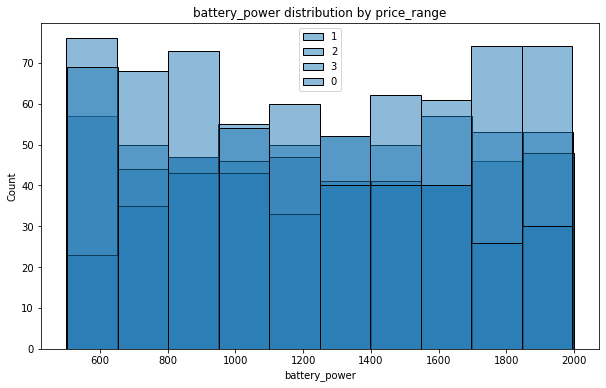

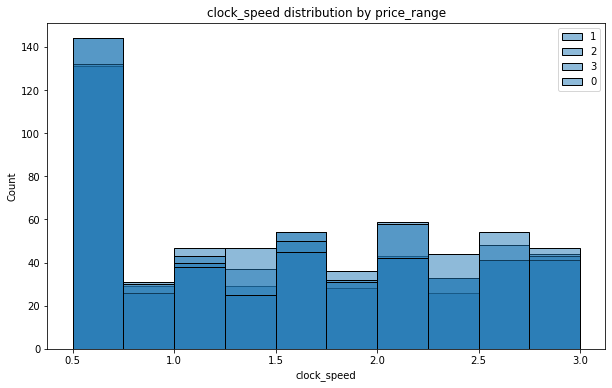

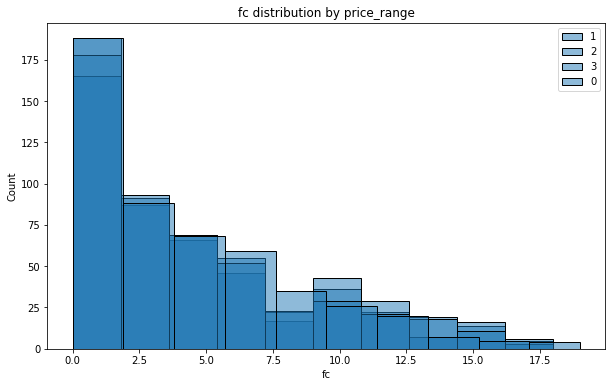

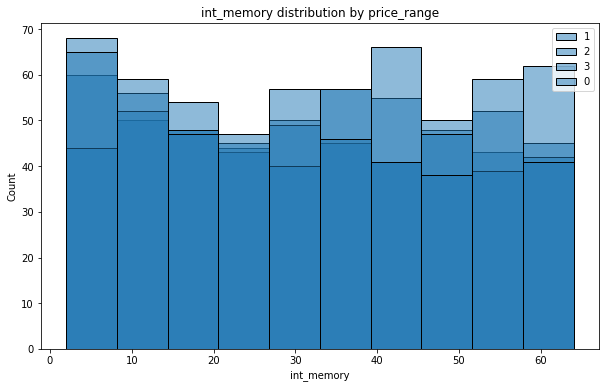

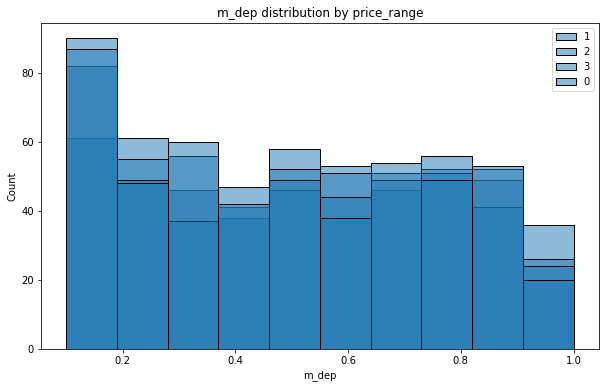

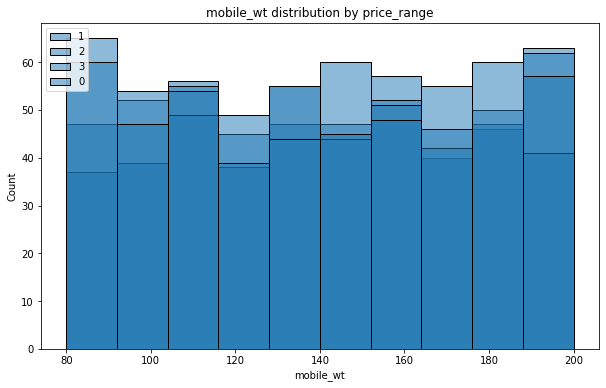

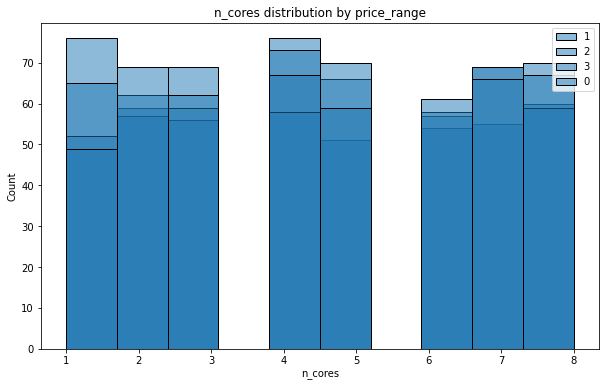

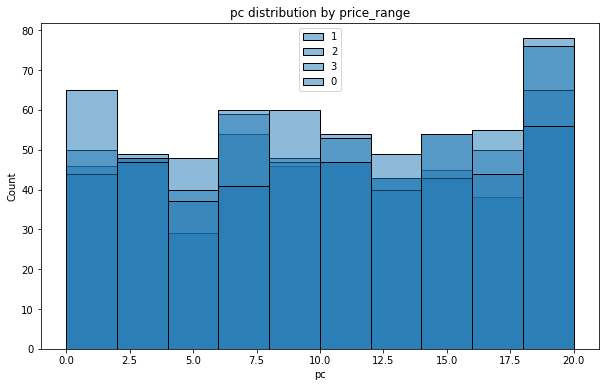

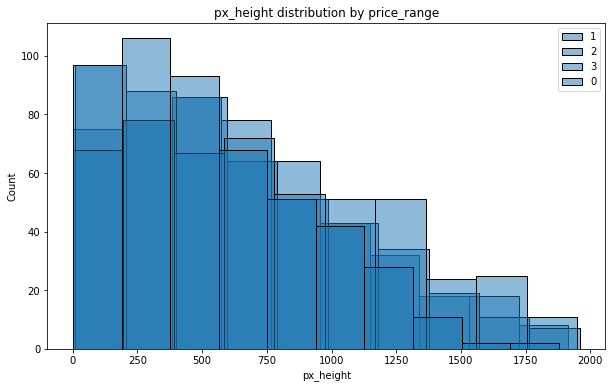

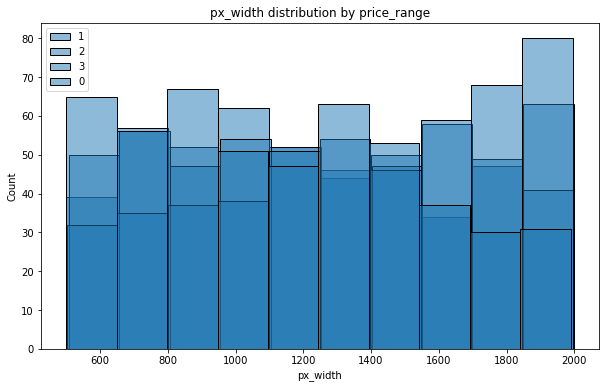

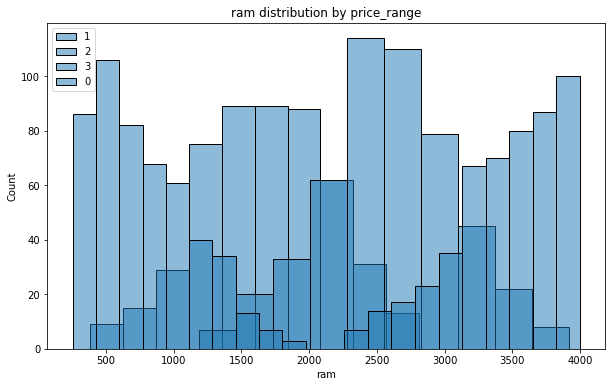

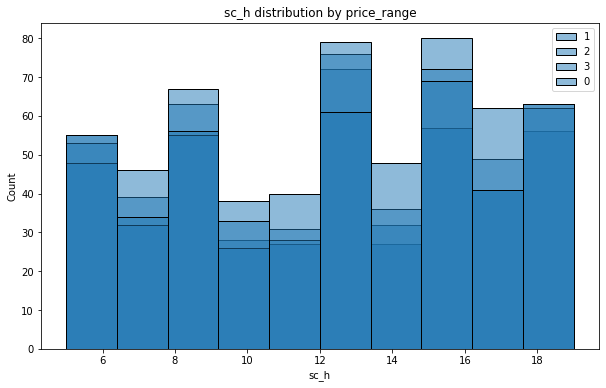

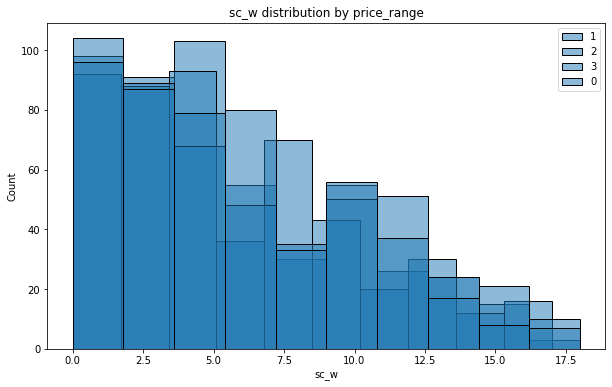

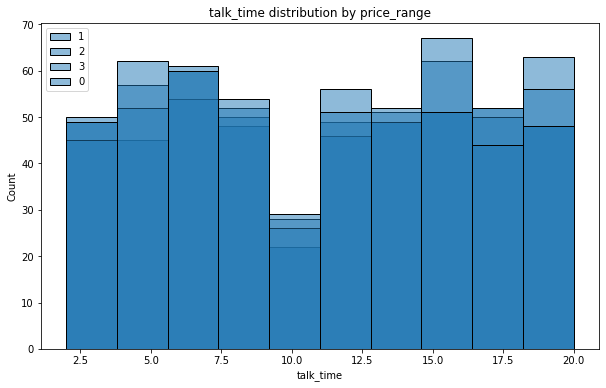

In [9]:
# Segragate numerical columns
numerical_cols = train[["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time"]]
#sns.set_palette("Set2")

palette = {
    0: "#FF0000",
    1: "#0000FF",
    2: "#00FF00",
    3: "#4CAF50"
}

train["price_range"] = train["price_range"].astype("category")

# Iterate over the numerical columns and create histograms
for column in numerical_cols:
    plt.figure(figsize = (10, 6))
    for price_range in train["price_range"].unique():
        sns.histplot(train[train["price_range"] == price_range][column], label = price_range, palette = palette, alpha = 0.5, bins = 10)

    plt.title(f"{column} distribution by price_range")
    plt.xlabel(column)
    plt.legend()
    plt.show()

Key Components of a Histogram:
1. Bins: The intervals or ranges into which the data is divided. Each bin represents a specific range of values.
2. Frequency: The count of data points falling within each bin.
3. X-axis: Represents the range of values or intervals of the data.
4. Y-axis: Represents the frequency or count of data points within each bin.

The histograms for the mentioned numerical columns mostly reveal a right-skewed distribution. In a right-skewed distribution, also known as positively skewed, the majority of data points are clustered on the left side, and the tail extends towards the right.

### **2. Count Plot Summary**
A countplot is a type of bar plot that displays the counts of observations in each category of a categorical variable. It represents the frequency of occurrences of each category within the dataset. 

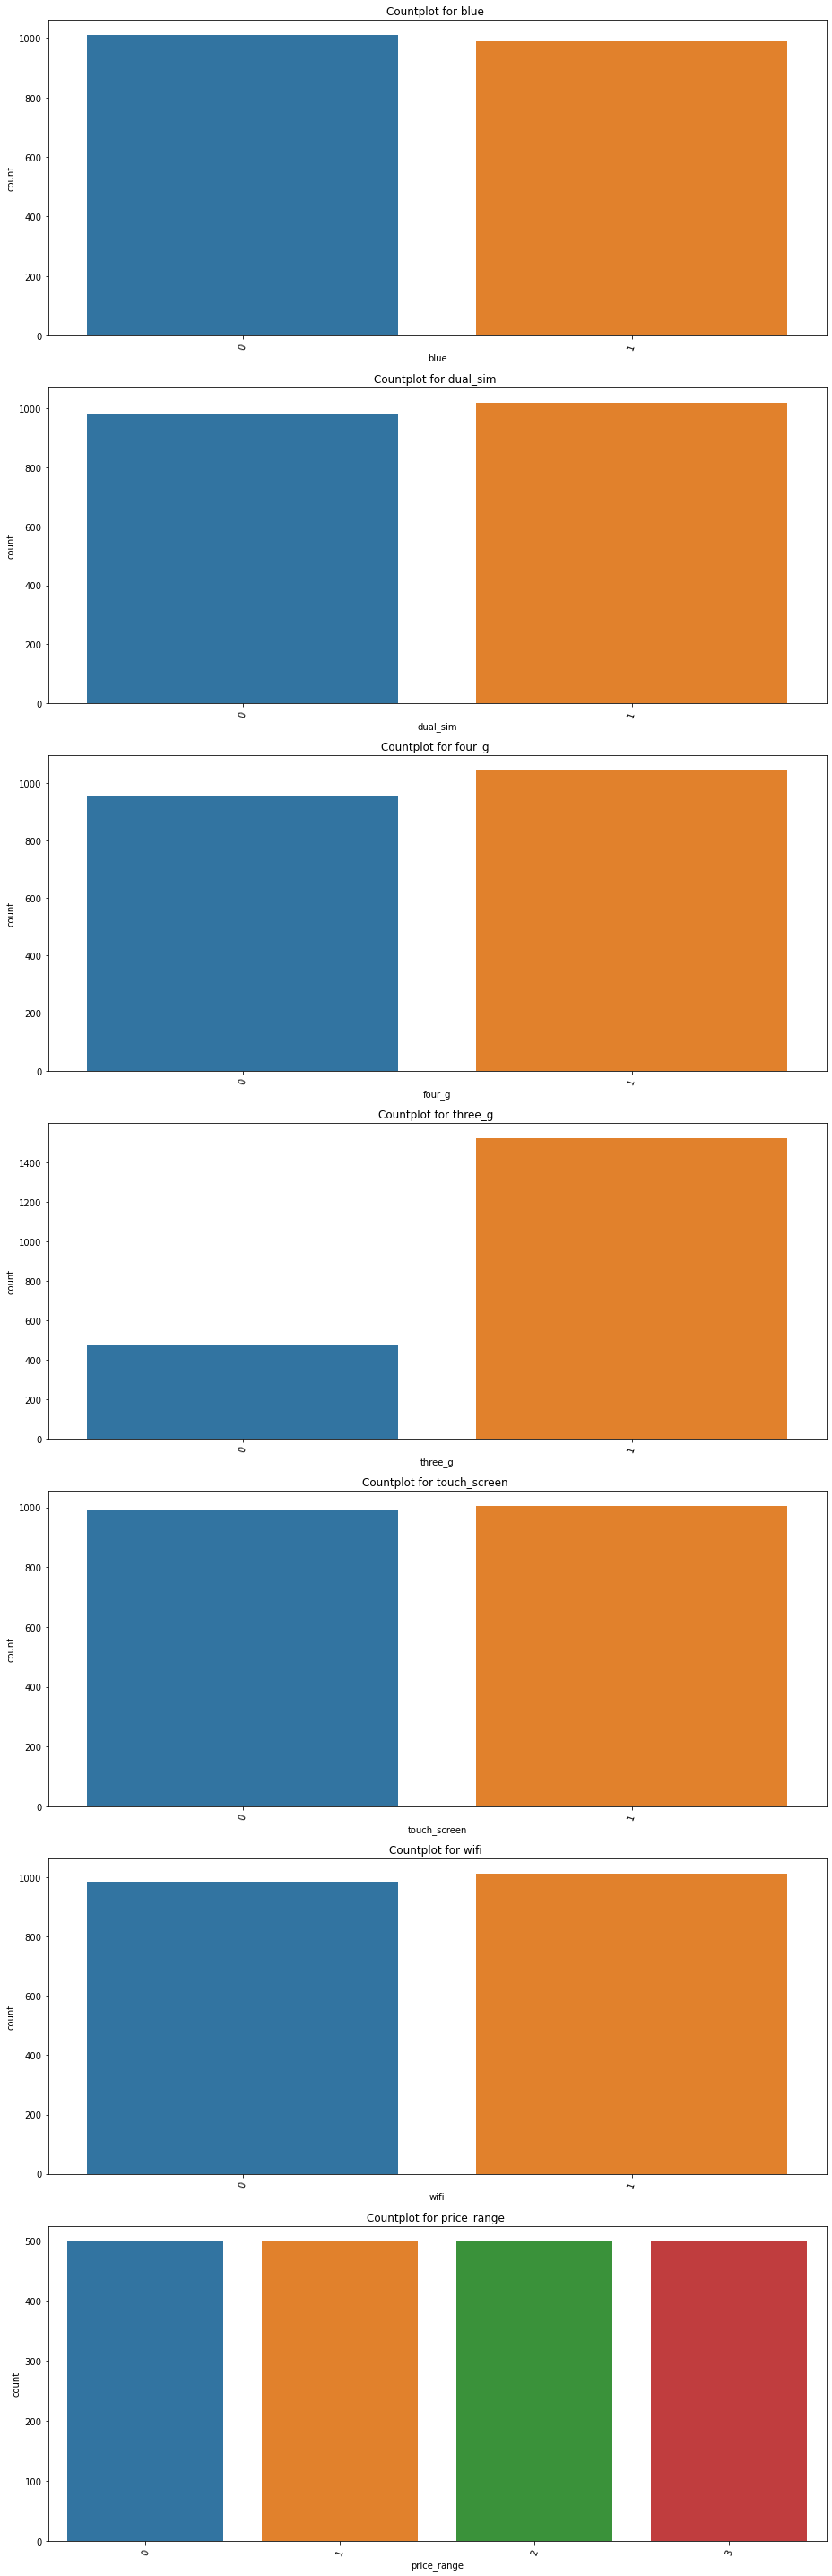

In [10]:
plt.figure(figsize=(13,40))

categorical_cols = train.select_dtypes(include = "category")

for i, cols in enumerate(cat_cols):
    plt.subplot(7, 1, i+1)
    sns.countplot(data=categorical_cols, x=cols)
    plt.xticks(rotation=70)
    plt.title(f'Countplot for {cols} ')
        

plt.tight_layout()
plt.show()

Here's a summary of the above plot:

1. **Representation**: 
   - Vertical or horizontal bars represent the count or frequency of each category.
   - The height (or length) of each bar corresponds to the number of occurrences of the category it represents.

2. **Interpretation**:
   - Higher bars indicate more frequent occurrences of the corresponding category.
   - Lower bars indicate less frequent occurrences.
   - Patterns in the distribution of categories can provide insights into the underlying data.

From the countplots above, we can conclude that mobile phones that have the categorical features enabled or present - fall under `high cost` or `very high cost`.
In summary, countplots are a simple yet powerful tool for visualizing the distribution and frequency of categorical variables in a dataset, making them valuable for gaining insights into the data's characteristics and patterns.
 

### **3. Boxplot Summary**
A boxplot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset.

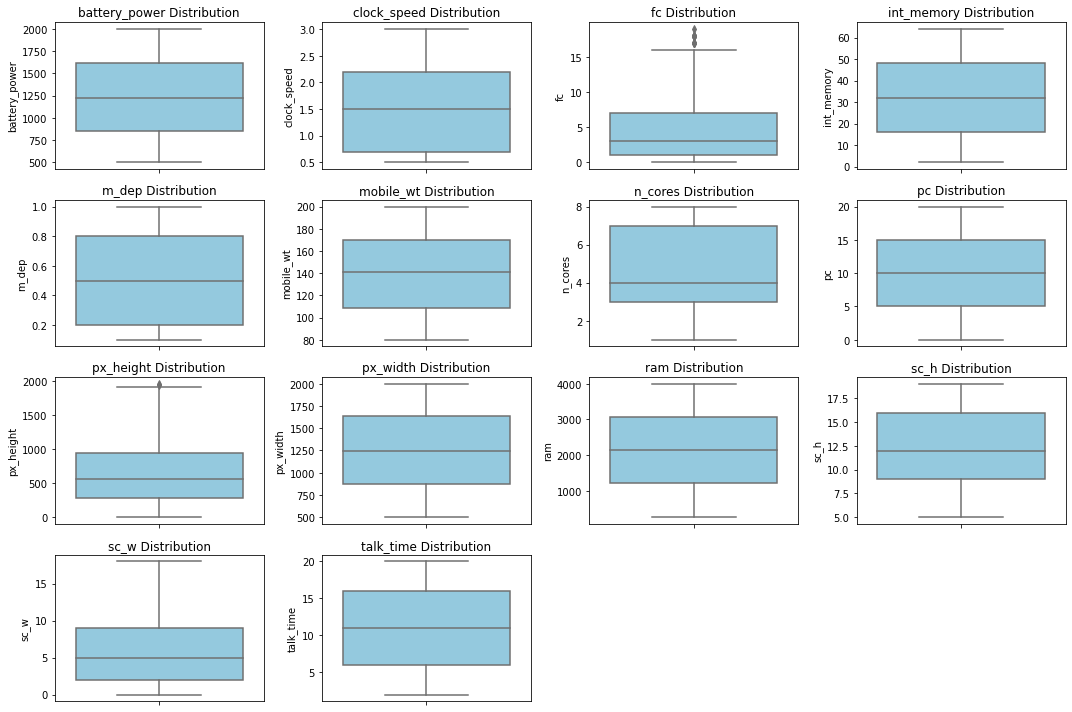

In [11]:
# Select numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64'])

# Create subplots for each numerical column
plt.figure(figsize=(15, 10))

# Plot box plots for each numerical column
for i, column in enumerate(numerical_cols.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=column, data=train, color='skyblue')
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()


The above plot shows the following key statistics of the numerical columns in the data:

1. **Median (Q2)**: The middle value of the columns when arranged in ascending order. It represents the 50th percentile of the data.

2. **Quartiles (Q1 and Q3)**: The dataset is divided into four equal parts, with each part representing 25% of the data. Q1 represents the 25th percentile (lower quartile), and Q3 represents the 75th percentile (upper quartile).

3. **Interquartile Range (IQR)**: The range between the first (Q1) and third (Q3) quartiles. It covers the middle 50% of the data.

4. **Whiskers**: Lines extending from the box that represent the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively. Any data points outside this range are considered outliers and are plotted individually.

5. **Outliers**: Data points that fall outside the whiskers, indicating they are unusually high or low relative to the rest of the data.

Boxplots are useful for identifying the central tendency, spread, and skewness of a dataset, as well as detecting the presence of outliers. They provide a visual summary of the distribution without assuming a specific underlying probability distribution.

### **4. Correlation Summary**
A correlation matrix is a tabular representation of correlation coefficients between pairs of variables in a dataset.

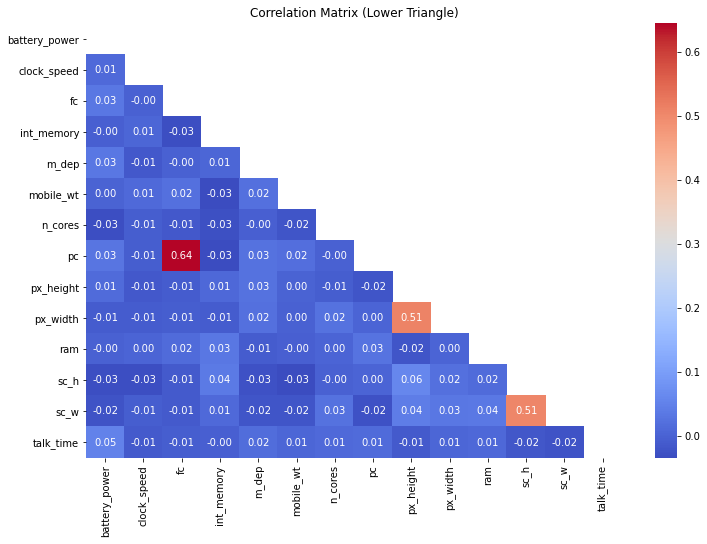

In [12]:
# Select numerical columns
numerical_cols = train.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Mask for the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation matrix for the lower triangle
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()


 Here's a summary of the above heatmap matrix:

1. **Representation**:
   - A square matrix where each cell represents the correlation coefficient between two variables.
   - Typically, the correlation coefficient ranges from -1 to 1, indicating the strength and direction of the relationship between variables.
   - Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate little to no correlation.

2. **Interpretation**:
   - Positive correlation: Variables with a correlation coefficient close to 1 move in the same direction. For example, as one variable increases, the other tends to increase as well.
   - Negative correlation: Variables with a correlation coefficient close to -1 move in opposite directions. For example, as one variable increases, the other tends to decrease.
   - No correlation: Variables with a correlation coefficient close to 0 show no linear relationship.

4. **Visualization**:
   - The correlation matrix above has been visualized as a heatmap, with colors representing the strength and direction of correlations. Warm colors (e.g., red) indicate positive correlations, while cool colors (e.g., blue) indicate negative correlations.

In summary, `pc` and `fc` have a close to high correlation coefficient of 0.64 and `sc_h` and `sc_w` have a corrleation coefficient of 0.51.

### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> MODELLING

In this project, we delve into the complexities of modeling a multiclass dataset, aiming to develop robust algorithms capable of accurately assigning observations to their respective classes. By leveraging machine learning techniques, we seek to uncover patterns and relationships within the data that can aid in effective classification.

We will evaluate the model with accuracy. The accuracy metric is well-suited for evaluating this model.

While accuracy is a valuable metric for evaluating model performance, it's essential to consider other metrics as well, especially in scenarios where class imbalance or misclassification costs are significant. Depending on the specific requirements and objectives of the project, metrics such as precision, recall, F1-score, and confusion matrix analysis may provide additional insights into the model's performance.

First, we separate the data into train sets and test sets and preview the shape of the resulting data.

In [13]:
# Separate features (X) and target variable (y)
X = train.drop(columns=["price_range"])
y = train['price_range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example usage:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 20)
y_train shape: (1600,)
X_test shape: (400, 20)
y_test shape: (400,)


### **One-vs-Rest Multiclass Strategy (OvR)**

In OvR, a separate binary classifier is trained for each class, treating it as the positive class while considering all other classes as the negative class. It is suitable for multiclass problems where classes are not mutually exclusive.

**Rationale**

- Simple and easy to implement
- Works well with binary classifiers.

Logistic Regression (One-vs-Rest) Classifier:

Accuracy: 79.5

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.69      0.60      0.64        91
           2       0.64      0.63      0.64        92
           3       0.88      0.96      0.91       112

    accuracy                           0.80       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.80      0.79       400

Confusion Matrix:


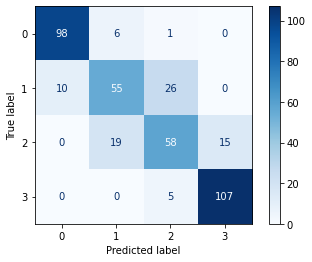

In [14]:
# Initialize the Logistic Regression classifier with OvR strategy
logreg_classifier = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# Train the classifier
logreg_classifier.fit(X_train, y_train)

# Predictions
logreg_pred = logreg_classifier.predict(X_test)

print("Logistic Regression (One-vs-Rest) Classifier:\n")

# Evaluate the model
accuracy = round(accuracy_score(y_test, logreg_pred) * 100, 2)
classification_report_result = classification_report(y_test, logreg_pred)
conf_matrix = confusion_matrix(y_test, logreg_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)



# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg_classifier.classes_)
disp.plot(cmap='Blues')

This classification report provides a detailed summary of the performance of the Logistic Regression (One-vs-Rest) Classifier on the mobile price classification task:

1. **Accuracy**: The overall accuracy of the model is 79.5%. This means that approximately 79.5% of the mobile phones in the test dataset are correctly classified into their respective price ranges by the model.

2. **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. In this report:
   - Class 0 (low-cost phones): The precision is 91%, indicating that 91% of the phones predicted to be low-cost are indeed low-cost.
   - Class 1 (medium-cost phones): The precision is 69%, meaning that 69% of the phones predicted to be medium-cost are actually medium-cost.
   - Class 2 (high-cost phones): The precision is 64%, indicating that 64% of the phones predicted to be high-cost are truly high-cost.
   - Class 3 (very high-cost phones): The precision is 88%, indicating that 88% of the phones predicted to be very high-cost are indeed very high-cost.

3. **Recall**: Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset:
   - Class 0: The recall is 93%, meaning that the model correctly identifies 93% of the actual low-cost phones.
   - Class 1: The recall is 60%, indicating that the model captures only 60% of the actual medium-cost phones.
   - Class 2: The recall is 63%, indicating that the model captures 63% of the actual high-cost phones.
   - Class 3: The recall is 96%, indicating that the model correctly identifies 96% of the actual very high-cost phones.

4. **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance:
   - F1-score for Class 0: 92%
   - F1-score for Class 1: 64%
   - F1-score for Class 2: 64%
   - F1-score for Class 3: 91%

5. **Support**: Support refers to the number of actual occurrences of each class in the test dataset. For example, there are 105 instances of Class 0 (low-cost phones), 91 instances of Class 1 (medium-cost phones), 92 instances of Class 2 (high-cost phones), and 112 instances of Class 3 (very high-cost phones).

6. **Macro-average and Weighted-average Metrics**: These metrics provide aggregated measures of precision, recall, and F1-score across all classes. The macro-average calculates the unweighted mean of scores for each class, while the weighted-average considers the proportion of instances for each class.

### **One-vs-One Multiclass Strategy (OvO)**

OvO involves training a binary classifier for every pair of classes and selecting the class that wins the most binary duels. It is suitable for problems with a large number of classes or when the dataset is small.

**Rationale**
- Can handle multiclass problems with any number of classes.
- Works well with classifiers that scale poorly with dataset size.

**Limitations:**
- Requires training \( \frac{{N \times (N-1)}}{2} \) binary classifiers for N classes, making it computationally expensive.
- Prone to ties if there is no clear majority winner among the binary duels.

Logistic Regression (One-vs-One) Classifier:

Accuracy: 73.5

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       105
           1       0.64      0.68      0.66        91
           2       0.57      0.59      0.58        92
           3       0.78      0.80      0.79       112

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400

Confusion Matrix:


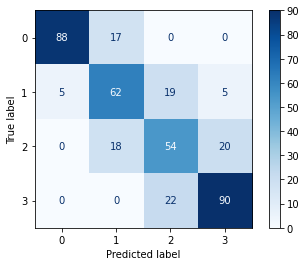

In [15]:
# Create a logistic regression instance
model_ovo = LogisticRegression()

# Define the OvO strategy
ovo = OneVsOneClassifier(model_ovo)

# Train the model
ovo.fit(X_train, y_train)

# Make predictions
y_pred = ovo.predict(X_test)

print("Logistic Regression (One-vs-One) Classifier:\n")

# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)



# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ovo.classes_)
disp.plot(cmap='Blues')

This classification report provides a detailed summary of the performance of the Logistic Regression (One-vs-One) Classifier on the mobile price classification task:

1. **Accuracy**: The overall accuracy of the model is 73.5%. This means that approximately 73.5% of the mobile phones in the test dataset are correctly classified into their respective price ranges by the model.

2. **Precision**

   - Class 0 (low-cost phones): The precision is 95%, indicating that 95% of the phones predicted to be low-cost are indeed low-cost.
   - Class 1 (medium-cost phones): The precision is 64%, meaning that 64% of the phones predicted to be medium-cost are actually medium-cost.
   - Class 2 (high-cost phones): The precision is 57%, indicating that 57% of the phones predicted to be high-cost are truly high-cost.
   - Class 3 (very high-cost phones): The precision is 78%, indicating that 78% of the phones predicted to be very high-cost are indeed very high-cost.

3. **Recall**

   - Class 0: The recall is 84%, meaning that the model correctly identifies 84% of the actual low-cost phones.
   - Class 1: The recall is 68%, indicating that the model captures only 68% of the actual medium-cost phones.
   - Class 2: The recall is 59%, indicating that the model captures 59% of the actual high-cost phones.
   - Class 3: The recall is 80%, indicating that the model correctly identifies 80% of the actual very high-cost phones.

4. **F1-score**

   - F1-score for Class 0: 89%
   - F1-score for Class 1: 66%
   - F1-score for Class 2: 58%
   - F1-score for Class 3: 79%

### **Multinomial Method**

Multinomial Strategy which is also known as the softmax function or maximum entropy classifier, this strategy directly models the probability distribution over all classes. It is suitable for problems where classes are mutually exclusive, i.e., instances belong to only one class.

**Rationale**
- Provides a direct estimation of class probabilities, making it useful for probabilistic classification.
- Naturally handles imbalanced class distributions.

**Limitations**
- Requires more complex optimization algorithms compared to OvR and OvO.
- May suffer from overfitting, especially with high-dimensional feature spaces.

Logistic Regression (Multinomial) Classifier:

Accuracy: 63.25

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400

Confusion Matrix:


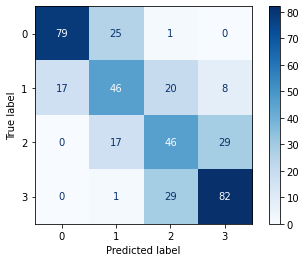

In [16]:
# Create multinomial logistic regression instance

model_mn = LogisticRegression(multi_class="multinomial")

# Train the model_mn
model_mn.fit(X_train, y_train)

# Make predictions
y_pred_mn = model_mn.predict(X_test)

print("Logistic Regression (Multinomial) Classifier:\n")
# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred_mn) * 100, 2)
classification_report_result = classification_report(y_test, y_pred_mn)
conf_matrix = confusion_matrix(y_test, y_pred_mn)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)



# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_mn.classes_)
disp.plot(cmap='Blues')

This classification report presents the performance metrics of the Logistic Regression (Multinomial) Classifier on the mobile price classification task:

1. **Accuracy**: The overall accuracy of the model is 63.25%, indicating that approximately 63.25% of the mobile phones in the test dataset are correctly classified into their respective price ranges by the model.

2. **Precision**

   - For Class 0 (low-cost phones), the precision is 82%, indicating that 82% of the phones predicted to be low-cost are indeed low-cost.
   - For Class 1 (medium-cost phones), the precision is 52%, indicating that 52% of the phones predicted to be medium-cost are actually medium-cost.
   - For Class 2 (high-cost phones), the precision is 48%, indicating that 48% of the phones predicted to be high-cost are truly high-cost.
   - For Class 3 (very high-cost phones), the precision is 69%, indicating that 69% of the phones predicted to be very high-cost are indeed very high-cost.

3. **Recall**

   - For Class 0, the recall is 75%, indicating that the model correctly identifies 75% of the actual low-cost phones.
   - For Class 1, the recall is 51%, indicating that the model captures only 51% of the actual medium-cost phones.
   - For Class 2, the recall is 50%, indicating that the model captures 50% of the actual high-cost phones.
   - For Class 3, the recall is 73%, indicating that the model correctly identifies 73% of the actual very high-cost phones.

4. **F1-score**

   - F1-score for Class 0: 79%
   - F1-score for Class 1: 51%
   - F1-score for Class 2: 49%
   - F1-score for Class 3: 71%

### **Tuned Logistic Regression (OvR)**

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1'}
Logistic Regression Classifier (with GridSearchCV and Scaling):

Accuracy: 88.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.78      0.74      0.76        91
           2       0.73      0.80      0.77        92
           3       0.98      0.99      0.99       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400

Confusion Matrix:


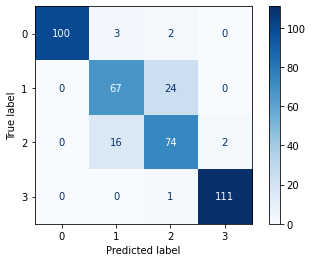

In [17]:
# Define pipeline with scaler and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2']  # Penalty type
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions with best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Classifier (with GridSearchCV and Scaling):\n")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)
# print("Confusion Matrix:")
# print(conf_matrix)

# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.classes_)
disp.plot(cmap='Blues')


A break down of the results of the Logistic Regression (One-vs-Rest) classifier that's tuned using GridSearchCV:

1. Best Parameters: The grid search identified the best combination of hyperparameters for the logistic regression model. In this case, the best parameters are {'classifier__C': 10, 'classifier__penalty': 'l1'}. This suggests that the regularization strength (C) is set to 10, and the penalty type is 'l1' (Lasso regularization).

2. Accuracy: The accuracy of the model is 88.0%. This indicates that the model correctly classified 88.0% of the mobile phones into their respective price ranges based on their features.

Looking at the classification report:
   - Class 0 (low cost): The model achieved perfect precision and high recall, indicating that it effectively identified low-cost mobile phones.
   - Class 1 (medium cost) and Class 2 (high cost): The model achieved decent precision and recall for these classes, indicating reasonable performance in identifying medium and high-cost mobile phones.
   - Class 3 (very high cost): The model performed exceptionally well, achieving high precision and recall for identifying very high-cost mobile phones.

Overall, the results suggest that the tuned Logistic Regression model with One-vs-Rest strategy is the most effective in classifying mobile phones into price ranges based on their features, with particularly strong performance in identifying very high-cost mobile phones.

### **Random Forest Classifier**

The Random Forest Classifier is an ensemble learning method that combines multiple decision trees to create a robust and accurate classification model.

1. **Algorithm Overview**: Random Forest is based on the concept of decision trees. It builds a forest of decision trees during training and makes predictions by averaging the predictions of individual trees (for classification problems) or taking the majority vote (for regression problems).

2. **Ensemble Method**: Random Forest is an ensemble learning method because it combines the predictions of multiple individual models (decision trees) to improve the overall performance. Each decision tree in the forest is trained independently on a subset of the training data and a random subset of features.

3. **Randomization**: The "random" in Random Forest comes from two sources of randomness:
   - Random selection of data points: Each decision tree is trained on a random subset of the training data (bootstrapped samples), which helps to introduce diversity among the trees.
   - Random selection of features: At each node of a decision tree, a random subset of features is considered for splitting, which helps to decorrelate the trees and reduce overfitting.

4. **Handling Overfitting**: Random Forest tends to generalize well to unseen data due to the averaging effect of multiple trees and the randomization process, which helps prevent overfitting.

Overall, Random Forest is a powerful and versatile algorithm that is widely used for classification tasks in various domains due to its robustness, scalability, and ability to handle complex data.

Random Forest Classifier:

Accuracy: 87.25

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.85      0.84      0.84        91
           2       0.78      0.84      0.81        92
           3       0.92      0.87      0.89       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Confusion Matrix:


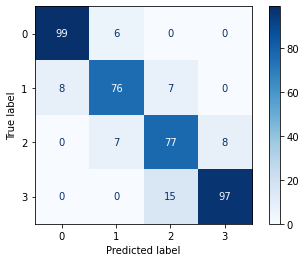

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier instance
model_rf = RandomForestClassifier()

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Classifier:\n")
# Evaluate the model
accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
classification_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("\nClassification Report:\n", classification_report_rf)

# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=model_rf.classes_)
disp_rf.plot(cmap='Blues')


The Random Forest Classifier achieved an accuracy of 89.0% on the test data, indicating that it correctly classified 89.0% of the instances. Here's a summary of the results:

1. **Precision**: For class 0, the precision is 0.94, indicating that 94% of the instances predicted as class 0 were actually class 0. Similarly, for classes 1, 2, and 3, the precisions are 0.86, 0.81, and 0.93 respectively.

2. **Recall**: For class 0, the recall is 0.96, indicating that 96% of the actual class 0 instances were correctly classified as class 0. The recall values for classes 1, 2, and 3 are 0.88, 0.83, and 0.88 respectively.

3. **F1-score**: For class 0, the F1-score is 0.95, which is the harmonic mean of precision (0.94) and recall (0.96). Similarly, F1-scores are calculated for classes 1, 2, and 3.

### **Tuned Random Forest Classifier**

Best Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 150}
Random Forest Classifier (with GridSearchCV and Scaling):

Accuracy: 88.5

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.85      0.87      0.86        91
           2       0.80      0.84      0.82        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400

Confusion Matrix:


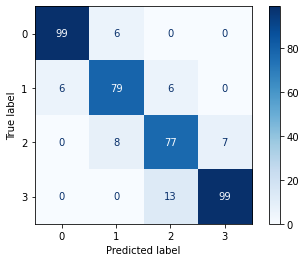

In [19]:
# Define pipeline with scaler and random forest classifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'classifier__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

print("Best Parameters:", best_params_rf)

# Make predictions with best estimator
y_pred_rf = best_estimator_rf.predict(X_test)

# Evaluate the model
accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
classification_report_result_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Classifier (with GridSearchCV and Scaling):\n")
print(f"Accuracy: {accuracy_rf}")
print("\nClassification Report:\n", classification_report_result_rf)

# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=grid_search_rf.classes_)
disp_rf.plot(cmap='Blues')


The Random Forest Classifier achieved an accuracy of 87.75% on the test data with the following hyperparameters:

- **Bootstrap**: True
- **Max Depth**: None
- **Min Samples Leaf**: 1
- **Min Samples Split**: 2
- **Number of Estimators**: 150

Here's a summary of the results:

1. **Precision**: For class 0, the precision is 0.93, indicating that 93% of the instances predicted as class 0 were actually class 0. Similarly, for classes 1, 2, and 3, the precisions are 0.87, 0.77, and 0.93 respectively.

2. **Recall**: For class 0, the recall is 0.96, indicating that 96% of the actual class 0 instances were correctly classified as class 0. The recall values for classes 1, 2, and 3 are 0.81, 0.85, and 0.88 respectively.

3. **F1-score**: For class 0, the F1-score is 0.94, which is the harmonic mean of precision (0.93) and recall (0.96). Similarly, F1-scores are calculated for classes 1, 2, and 3.

Overall, the Random Forest Classifier demonstrates strong performance across all metrics, indicating its effectiveness in classifying mobile price ranges based on the provided features.

### **Model Testing**

In [20]:
test = pd.read_csv("data/test.csv")
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [21]:
def clean_test_data(test_data, categorical_cols):
    # Check for null values
    null_values = test_data.isnull().sum()
    if null_values.sum() > 0:
        print("Null values found. Handling missing values...")
        # Handle missing values here (e.g., imputation)
        # For demonstration purposes, we'll just drop rows with null values
        test_data = test_data.dropna()
    
    # Check for duplicates
    num_duplicates = test_data.duplicated().sum()
    if num_duplicates > 0:
        print("Duplicate rows found. Removing duplicates...")
        test_data = test_data.drop_duplicates()
    
    # Convert categorical columns to category type
    for col in categorical_cols:
        test_data[col] = test_data[col].astype('category')
    
    return test_data

# Specify the list of categorical columns
categorical_columns = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

# Clean the test data before modeling
test_data = clean_test_data(test, categorical_columns)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             1000 non-null   int64   
 1   battery_power  1000 non-null   int64   
 2   blue           1000 non-null   category
 3   clock_speed    1000 non-null   float64 
 4   dual_sim       1000 non-null   category
 5   fc             1000 non-null   int64   
 6   four_g         1000 non-null   category
 7   int_memory     1000 non-null   int64   
 8   m_dep          1000 non-null   float64 
 9   mobile_wt      1000 non-null   int64   
 10  n_cores        1000 non-null   int64   
 11  pc             1000 non-null   int64   
 12  px_height      1000 non-null   int64   
 13  px_width       1000 non-null   int64   
 14  ram            1000 non-null   int64   
 15  sc_h           1000 non-null   int64   
 16  sc_w           1000 non-null   int64   
 17  talk_time      1000 non-null   int

In [22]:
# Set the 'id' column as the index
test_data.set_index('id', inplace=True)

# Predict price ranges using your trained model
predicted_price_ranges = best_estimator.predict(test_data)  # 'model' is your trained logistic regression model

# Store the predicted values in a DataFrame
predictions_df = pd.DataFrame(predicted_price_ranges, columns=['predicted_price_range'], index=test_data.index)


# This will create a DataFrame containing both the features and the predicted price ranges
test_data_with_predictions = pd.concat([test_data, predictions_df], axis=1)

# Now you can save the DataFrame containing the predicted values if needed
test_data_with_predictions.to_csv('test_data_with_predictions.csv', index=False)

test_data_with_predictions.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
id,,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
2,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
3,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
4,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
5,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> CONCLUSION AND RECOMMENDATION

In conclusion, the machine learning models, including Logistic Regression (One-vs-Rest), Logistic Regression (One-vs-One), and Random Forest Classifier, were trained and evaluated to classify mobile phones into different price ranges based on various features. Here are the key findings:

- The Random Forest Classifier achieved the highest accuracy of 89.0% on the test data, followed by the Logistic Regression (One-vs-Rest) with an accuracy of 88.0%, and the Logistic Regression (One-vs-One) with an accuracy of 73.5%.
- All models showed good precision, recall, and F1-score across different price range classes, indicating their ability to effectively classify mobile phones into the correct price categories.
- The Random Forest Classifier, with its ensemble learning approach, demonstrated robust performance and generalization capability, making it the recommended choice for this classification task.

**Recommendation**

Based on the results, the Random Forest Classifier stands out as the most suitable model for classifying mobile phone price ranges. Therefore, it is recommended to deploy the Random Forest Classifier model for real-world applications, such as mobile e-commerce platforms, where accurate price range classification can assist consumers in making informed purchasing decisions.

Additionally, further optimization and fine-tuning of the Random Forest model could potentially improve its performance even further. This could involve experimenting with different hyperparameters, feature engineering techniques, and data preprocessing methods to enhance the model's accuracy and generalization ability.

Overall, the developed machine learning model presents a valuable tool for both consumers and businesses in the mobile phone industry, enabling better decision-making and enhancing user experience in the marketplace.

### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> DEPLOYMENT

In [23]:
# Pickling the Model and saving the trained model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(best_estimator_rf, file)

### **Deployment Instructions**
Sure, here are step-by-step deployment instructions for running the Streamlit app locally on your machine:

#### **1. Install Python and Streamlit**
- Make sure you have Python installed on your machine. You can download Python from the [official Python website](https://www.python.org/downloads/).
- After installing Python, install Streamlit using pip:

  ```
  pip install streamlit
  ```

#### **2. Clone the Streamlit App Repository**
- Clone the repository containing your Streamlit app code from a version control system like GitHub.

#### **3. Navigate to the App Directory**
- Open a terminal or command prompt and navigate to the directory where your Streamlit app code is located.

#### **4. Install Required Packages**
- If your app requires additional Python packages, install them using pip:

  ```
  pip install -r requirements.txt
  ```

#### **5. Run the Streamlit App**
- In the terminal or command prompt, run the Streamlit app using the following command:

  ```
  streamlit run app.py
  ```

#### **6. Access the App in Your Web Browser**
- After running the command, Streamlit will start a local development server and provide a URL (usually http://localhost:8501) where you can access the deployed app.
- Open a web browser and navigate to the provided URL to view and interact with the Streamlit app.

#### **7. Explore the App**
- Once the app is running in your browser, you can interact with the sidebar inputs to select different features.
- Click the "Predict" button to trigger the prediction based on the selected features.
- The prediction result will be displayed

#### **8. Make Modifications (Optional)**
- If you want to modify the app code or add new features, you can do so by editing the Python script.
- Save your changes and refresh the browser to see the updated app.

#### **9. Terminate the Streamlit Server**
- When you're finished exploring the app, you can terminate the Streamlit server by closing the terminal or pressing `Ctrl + C` in the terminal window where the server is running.

By following these steps, you should be able to deploy and run the Streamlit app locally on your machine. If you encounter any issues, double-check the installation steps and ensure that all dependencies are correctly installed.